In [ ]:
# ADS Assignment-3           VISWA BRAHMANA NANDA KISHORE           20BEC0260

In [39]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Loading the dataset
data =pd.read_csv("C:\\My PC (DESKTOP-4SCLE5B)\\Downloads\\ADS\\Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [41]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


# Univariate analysis

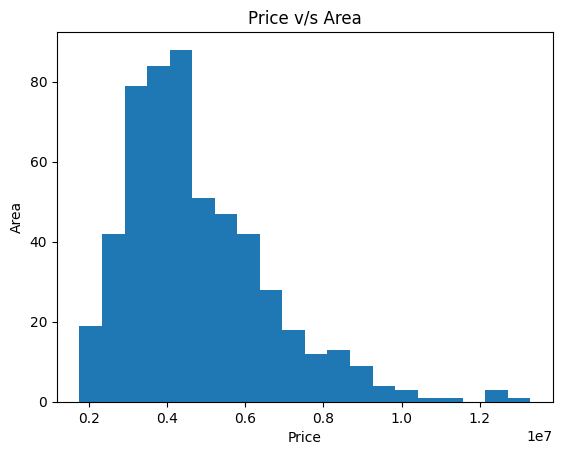

In [42]:
#Histogram
plt.hist(data['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Price v/s Area')
plt.show()

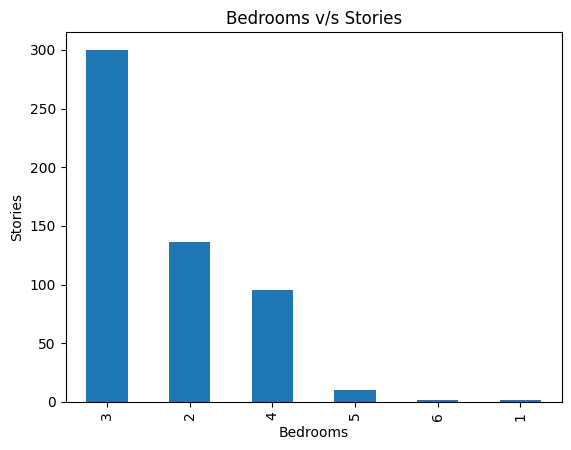

In [43]:
#BarPlot
data['bedrooms'].value_counts().plot(kind = 'bar')
plt.xlabel('Bedrooms')
plt.ylabel('Stories')
plt.title('Bedrooms v/s Stories')
plt.show()

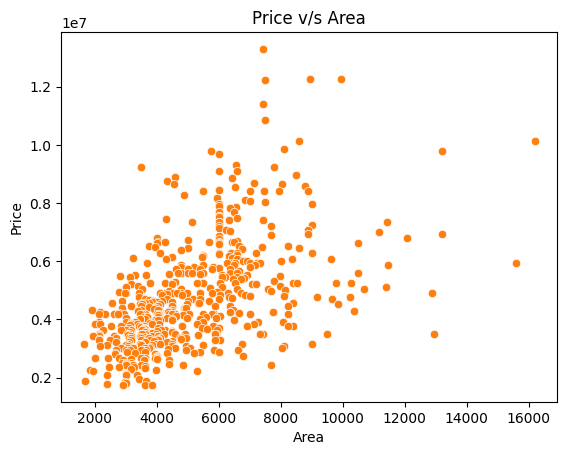

In [44]:
# Scatter Plot
sns.scatterplot(x='area', y='price', data=data)
sns.scatterplot(x='area', y='price', data=data)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price v/s Area')
plt.show()

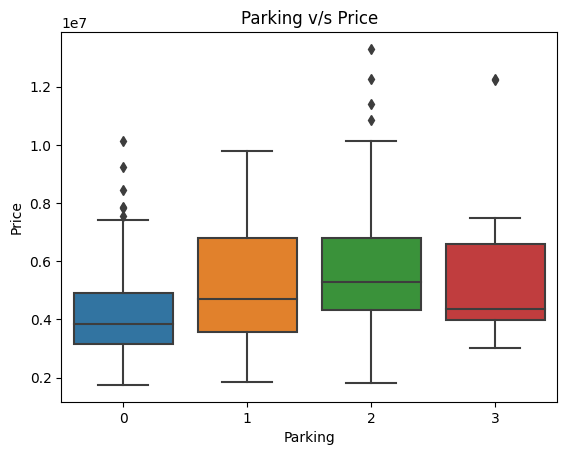

In [45]:
# Box Plot
sns.boxplot(x='parking',y='price', data=data)
plt.xlabel('Parking')
plt.ylabel('Price')
plt.title('Parking v/s Price')
plt.show()

# Multivariate analysis

C:\Users\vnand\AppData\Local\Temp\ipykernel_25676\1421770020.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


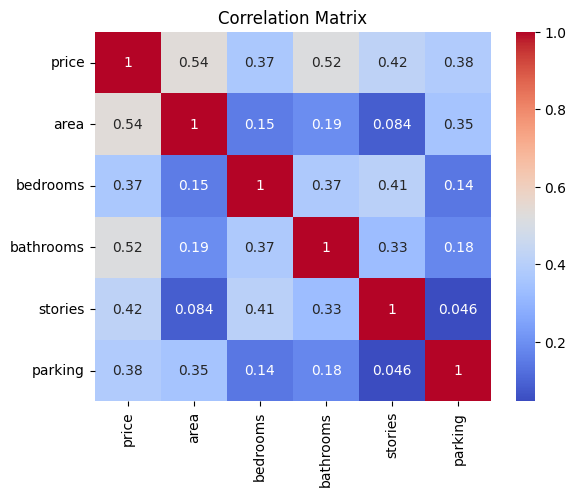

In [46]:
# Correlation Matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

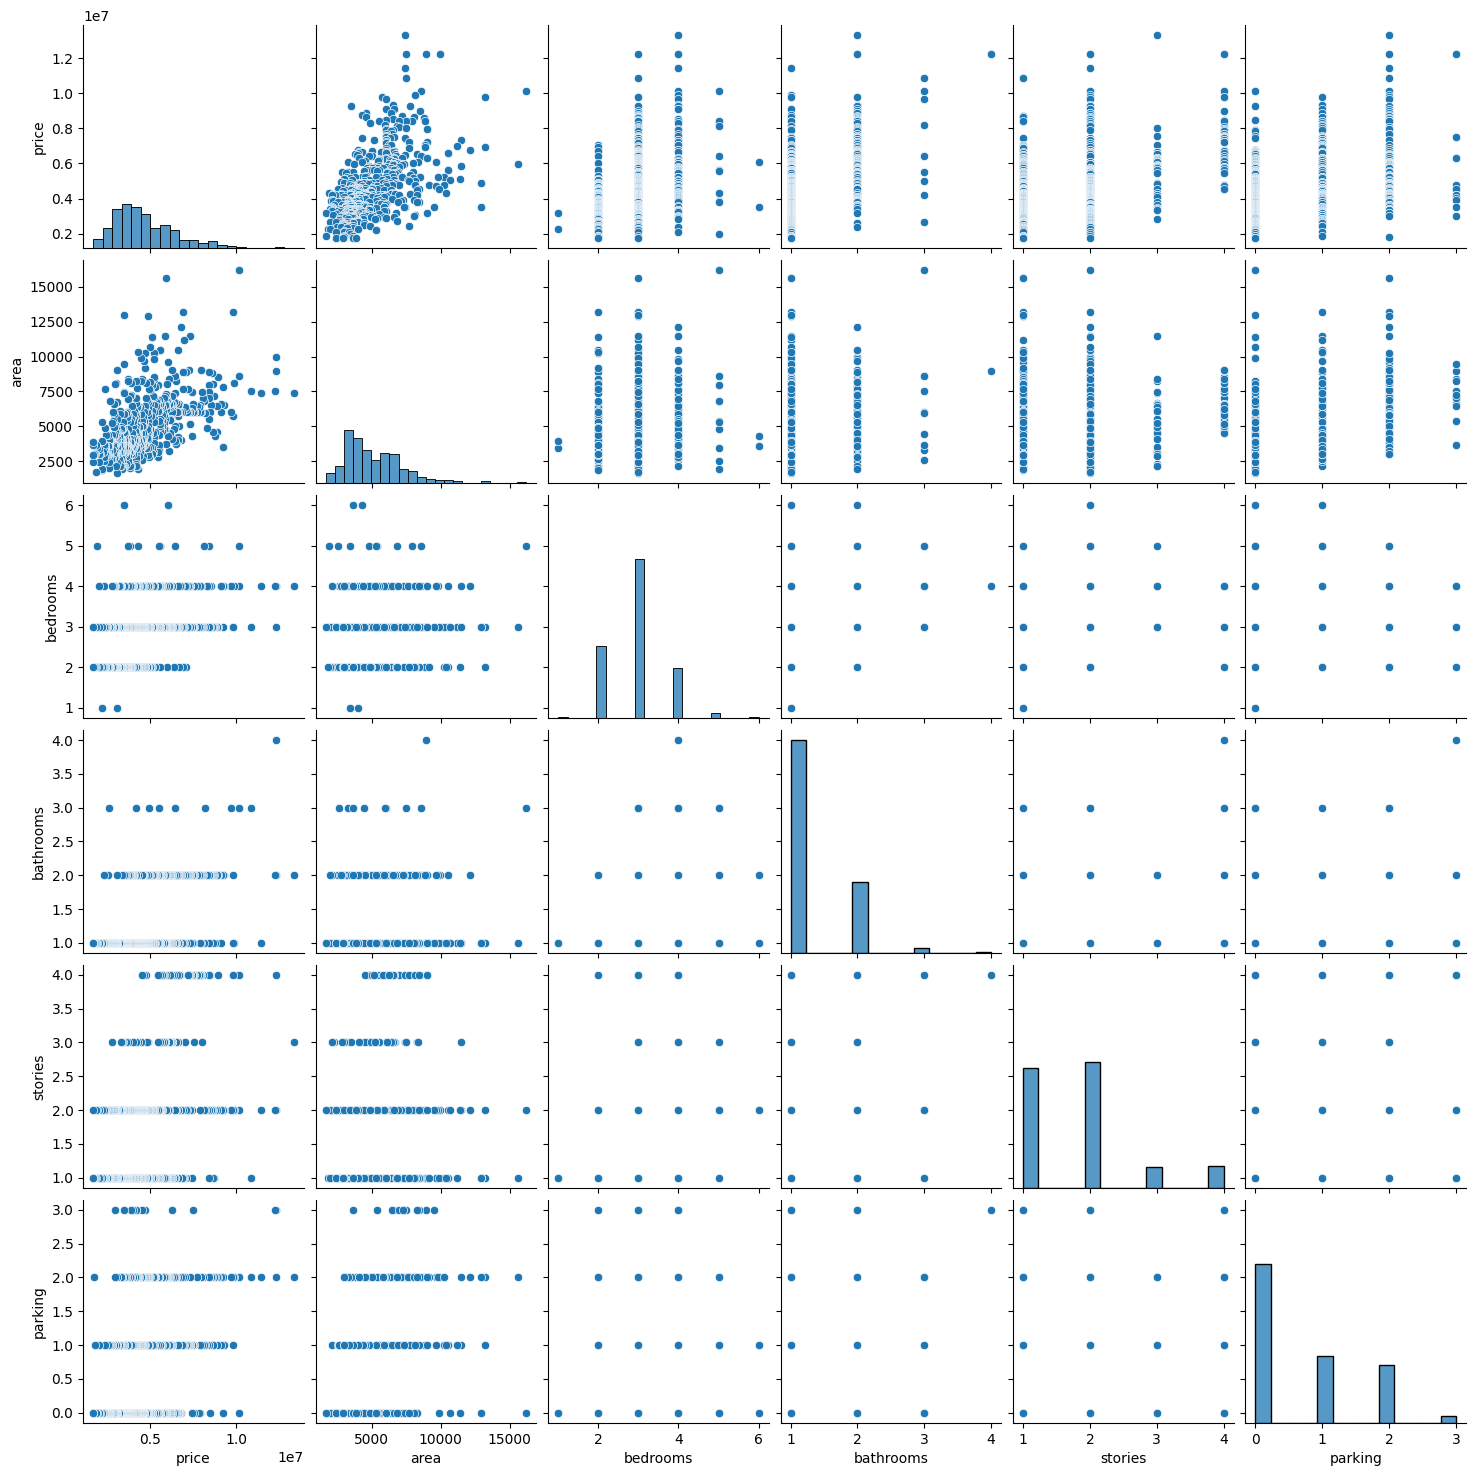

In [47]:
# Pair plot
sns.pairplot(data)
plt.show()

# Descriptive Statistics

In [48]:
statistics = data.describe()
statistics

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [49]:
# null values
nv= data.isnull().sum()
nv

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [50]:
#data=data.dropna()

In [51]:
# Detecting Outliners
def detect_outliers_zscore(data,threshold=3):
    z_scores = np.abs((data-data.mean())/data.std())
    outliers=data[z_scores > threshold]
    return outliers
numerical_columns = ['price', 'area','bedrooms','bathrooms','stories','parking']
for column in numerical_columns:
    outliers = detect_outliers_zscore(data[column])
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in price:
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
5    10850000
Name: price, dtype: int64
Outliers in area:
7      16200
10     13200
66     13200
69     12090
125    15600
211    12900
403    12944
Name: area, dtype: int64
Outliers in bedrooms:
112    6
395    6
Name: bedrooms, dtype: int64
Outliers in bathrooms:
1      4
5      3
6      3
7      3
11     3
33     3
89     3
153    3
195    3
290    3
499    3
Name: bathrooms, dtype: int64
Outliers in stories:
Series([], Name: stories, dtype: int64)
Outliers in parking:
Series([], Name: parking, dtype: int64)


In [52]:
# Replacing the Outliers
def replace_outliers(data, column, method='median', threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[z_scores > threshold]
    
    if method == 'median':
        replacement_value = data[column].median()
    elif method == 'mean':
        replacement_value = data[column].mean()
    else:
        raise ValueError("Invalid replacement method. Choose 'median' or 'mean'.")
    
    data.loc[z_scores > threshold, column] = replacement_value
    
    return data

numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms','stories','parking']
for column in numerical_columns:
    data = replace_outliers(data, column, method='median')
data.to_csv('housing_without_outliers.csv', index=False)

In [53]:
# Categorical Columns
categorical_columns= data.select_dtypes(include=['object']).columns

In [54]:
# One-Hot Encoding
data_encoded = pd.get_dummies(data,columns=categorical_columns)

In [55]:
# Splitting the dependent and indepepdent Variables
X = data.drop('price', axis=1)    #independent
y=data['price']    #dependent

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Build 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Test
y_pred = model.predict(X_test)

In [42]:
# Measure performance
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)


RMSE: 40.29813356022482
R-squared: 0.5744138777194269
